# Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Data

In [2]:
data = {
  1: ["Adrien Brody", "EUA", "Melhor Ator", "The Brutalist"],
  2: ["Kieran Culkin", "EUA", "Melhor Ator Coadjuvante", "A Real Pain"],
  3: ["Mikey Madison", "EUA", "Melhor Atriz", "Anora"],
  4: ["Zoe Saldaña", "EUA", "Melhor Atriz Coadjuvante", "Emilia Pérez"],
  5: ["Gints Zilbalodis", "Letônia", "Melhor Animação", "Flow"],
  6: ["Matīss Kaža", "Suécia", "Melhor Animação", "Flow"],
  7: ["Ron Dyens", "França", "Melhor Animação", "Flow"],
  8: ["Gregory Zalcman", "Bélgica", "Melhor Animação", "Flow"],
  9: ["Shirin Sohani", "Irã", "Melhor Curta-Metragem de Animação", "In the Shadow of the Cypress"],
  10: ["Hossein Molayemi", "Irã", "Melhor Curta-Metragem de Animação", "In the Shadow of the Cypress"],
  11: ["Lol Crawley", "UK", "Melhor Cinematografia", "The Brutalist"],
  12: ["Paul Tazewell", "EUA", "Melhor Figurino", "Wicked"],
  13: ["Basel Adra", "Palestina", "Melhor Documentário de Longa-Metragem", "No Other Land"],
  14: ["Rachel Szor", "Israel", "Melhor Documentário de Longa-Metragem", "No Other Land"],
  15: ["Hamdan Ballal", "Palestina", "Melhor Documentário de Longa-Metragem", "No Other Land"],
  16: ["Yuval Abraham", "Israel", "Melhor Documentário de Longa-Metragem", "No Other Land"],
  17: ["Molly O’Brien", "EUA", "Melhor Documentário de Curta-Metragem", "The Only Girl in the Orchestra"],
  18: ["Lisa Remington", "EUA", "Melhor Documentário de Curta-Metragem", "The Only Girl in the Orchestra"],
  19: ["Sean Baker", "EUA", "Melhor Edição", "Anora"],
  20: ["Sean Baker", "EUA", "Melhor Direção", "Anora"],
  21: ["Pierre-Olivier Persin", "França", "Melhor Maquiagem e Penteado", "The Substance"],
  22: ["Stéphanie Guillon", "França", "Melhor Maquiagem e Penteado", "The Substance"],
  23: ["Marilyne Scarselli", "França", "Melhor Maquiagem e Penteado", "The Substance"],
  24: ["Walter Salles", "Brasil", "Melhor Filme Internacional", "Ainda Estou Aqui"],
  25: ["Daniel Blumberg", "UK", "Melhor Trilha Sonora Original", "The Brutalist"],
  26: ["Sean Baker", "EUA", "Melhor Filme", "Anora"],
  27: ["Samantha Quan", "Canadá", "Melhor Filme", "Anora"],
  28: ["Alex Coco", "EUA", "Melhor Filme", "Anora"],
  29: ["Clément Ducol", "França", "Melhor Canção Original", "Emilia Pérez"],
  30: ["Camille Dalmais", "França", "Melhor Canção Original", "Emilia Pérez"],
  31: ["Jacques Audiard", "França", "Melhor Canção Original", "Emilia Pérez"],
  32: ["Lee Sandales", "UK", "Melhor Direção de Arte", "Wicked"],
  33: ["Nathan Crowley", "UK", "Melhor Direção de Arte", "Wicked"],
  34: ["Victoria Warmerdam", "Países Baixos", "Melhor Curta-Metragem em Live Action", "I'm Not a Robot"],
  35: ["Trent", "Países Baixos", "Melhor Curta-Metragem em Live Action", "I'm Not a Robot"],
  36: ["Gareth John", "UK", "Melhor Som", "Dune: Part Two"],
  37: ["Richard King", "EUA", "Melhor Som", "Dune: Part Two"],
  38: ["Ron Bartlett", "EUA", "Melhor Som", "Dune: Part Two"],
  39: ["Doug Hemphill", "EUA", "Melhor Som", "Dune: Part Two"],
  40: ["Paul Lambert", "EUA", "Melhores Efeitos Visuais", "Dune: Part Two"],
  41: ["Stephen James", "UK", "Melhores Efeitos Visuais", "Dune: Part Two"],
  42: ["Rhys Salcombe", "Canadá", "Melhores Efeitos Visuais", "Dune: Part Two"],
  43: ["Gerd Nefzer", "Alemanha", "Melhores Efeitos Visuais", "Dune: Part Two"],
  44: ["Peter Straughan", "UK", "Melhor Roteiro Adaptado", "Conclave"],
  45: ["Sean Baker", "EUA", "Melhor Roteiro Original", "Anora"]
}

In [3]:
data_airports = {
  1: ["Lisboa (LIS)", ["DF (BSB)", 10], ["SP (GRU)", 10], ["RJ (GIG)", 10]],
  2: ["DF (BSB)", ["Lisboa (LIS)", 10], ["RJ (GIG)", 2], ["SP (GRU)", 2]],
  3: ["SP (GRU)", ["DF (BSB)", 2], ["RJ (GIG)", 1], ["Lisboa (LIS)", 10]],
  4: ["RJ (GIG)", ["SP (GRU)", 1], ["DF (BSB)", 2], ["Lisboa (LIS)", 10], ["SP (SJK)", 1]],
  5: ["SP (SJK)", ["RJ (GIG)", 1]]
}

In [4]:
data_highways_model_1 = {
  1: ["São Bernardo", ["SJC", 116], ["São Paulo", 22.6], ["Campinas", 151]],
  2: ["SJC", ["São Bernardo", 117], ["São Paulo", 91.8]],
  3: ["São Paulo", ["Campinas", 93]],
  4: ["Campinas", ["SJC", 150]]
}

In [5]:
data_highways_model_2 = {
  1: ["São Bernardo", ["SJC", "Mario Covas"], ["São Paulo", "Anchieta"], ["Campinas", "Anhanguera"]],
  2: ["SJC", ["São Bernardo", "Mario Covas"], ["São Paulo", "BR-116"]],
  3: ["São Paulo", ["Campinas", "Bandeirantes"]],
  4: ["Campinas", ["SJC", "Dom Pedro I"]]
}

# Os Grafos

## Exercício 1

### Modelo 1

#### Geração da lógica de conexão do grafo

In [6]:
G = nx.Graph()

for actor in data.values():
  G.add_node(actor[0])


for actual_actor in data:
  for comparing_actor in data:
    if (data[actual_actor][1] == data[comparing_actor][1]) and (data[actual_actor][0] != data[comparing_actor][0]):
      G.add_edge(data[actual_actor][0], data[comparing_actor][0])

#### Plotagem do grafo

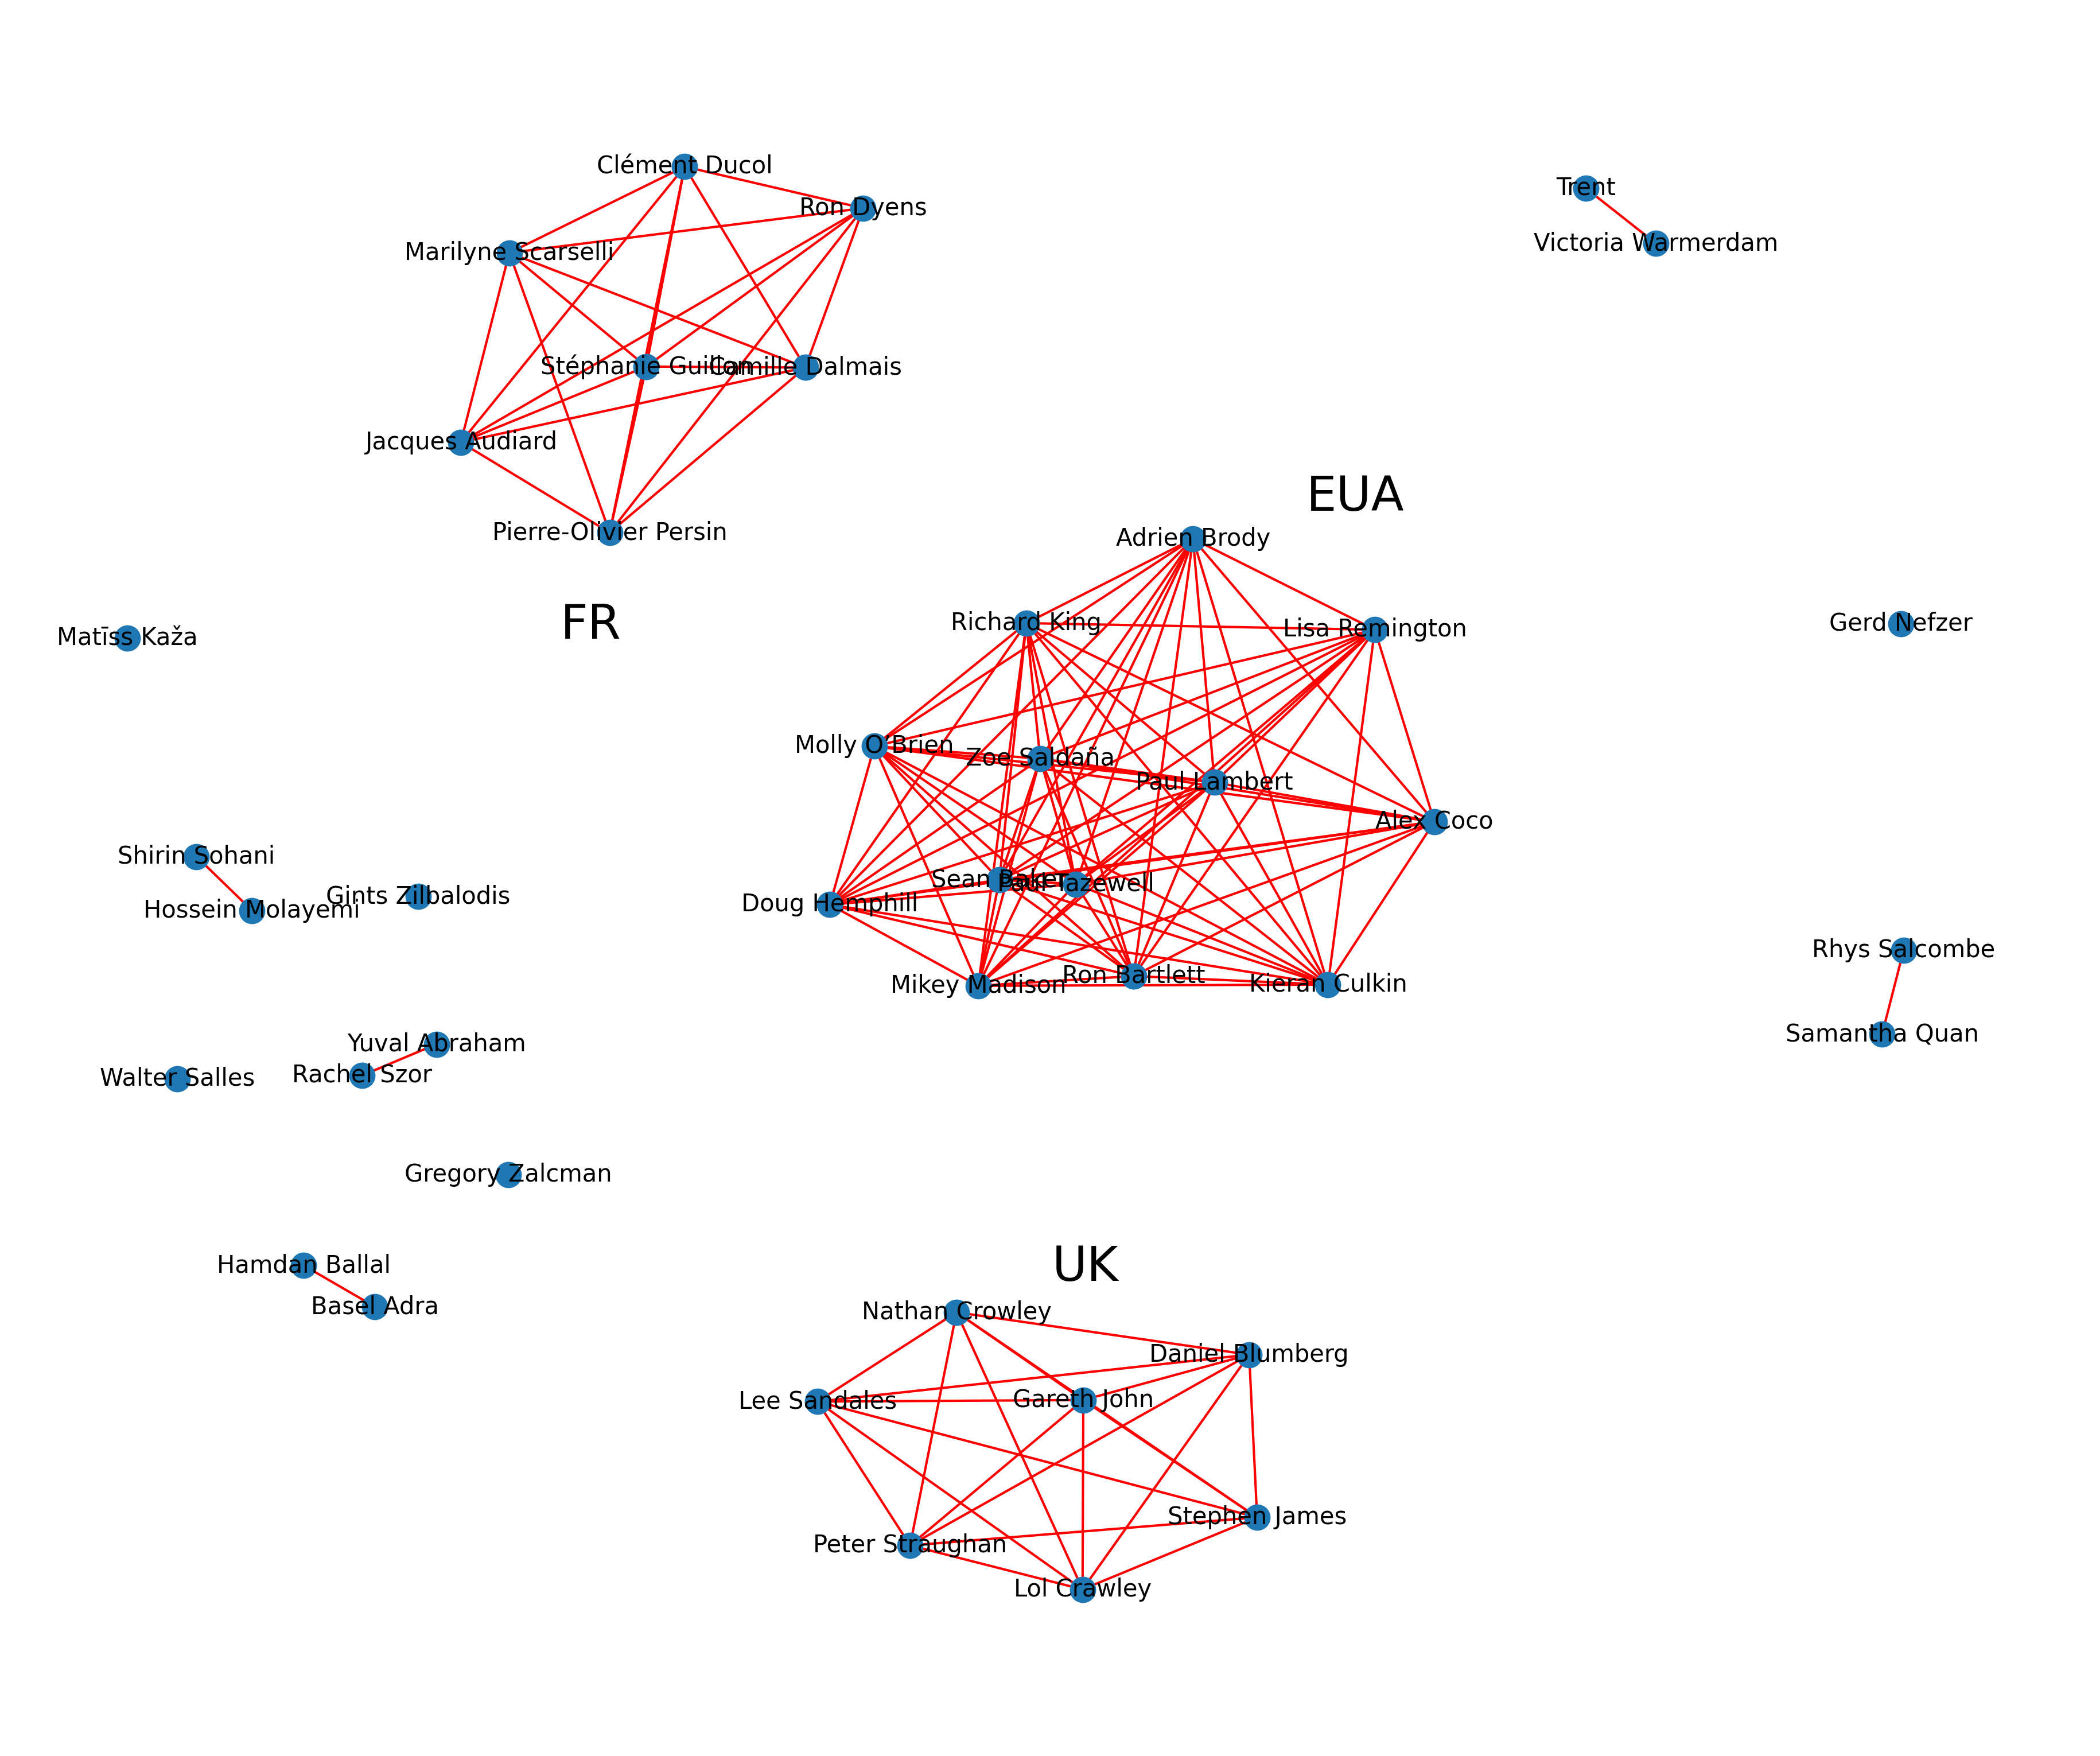

In [ ]:
plt.figure(dpi = 300, figsize = (12, 10))

position = nx.forceatlas2_layout(G, dissuade_hubs = True, gravity = 20, seed = 42)

nx.draw(G, position, with_labels=True, node_size = 100, font_size = 10, font_color = "black", edge_color = "red")

###--- Nomeação dos maiores clusters

plt.annotate("EUA", [8, 10], fontsize = 20)
plt.annotate("UK", [0.5, -14], fontsize = 20)
plt.annotate("FR", [-14, 6], fontsize = 20)

plt.show()

### Modelo 2

#### Geração da lógica da conexão do grafo

In [ ]:
G = nx.Graph()

for actor in data.values():
  G.add_node(actor[0])


for actual_actor in data:
  for comparing_actor in data:
    if (data[actual_actor][2] == data[comparing_actor][2]) and (data[actual_actor][0] != data[comparing_actor][0]):
      G.add_edge(data[actual_actor][0], data[comparing_actor][0])

#### Plotagem do grafo

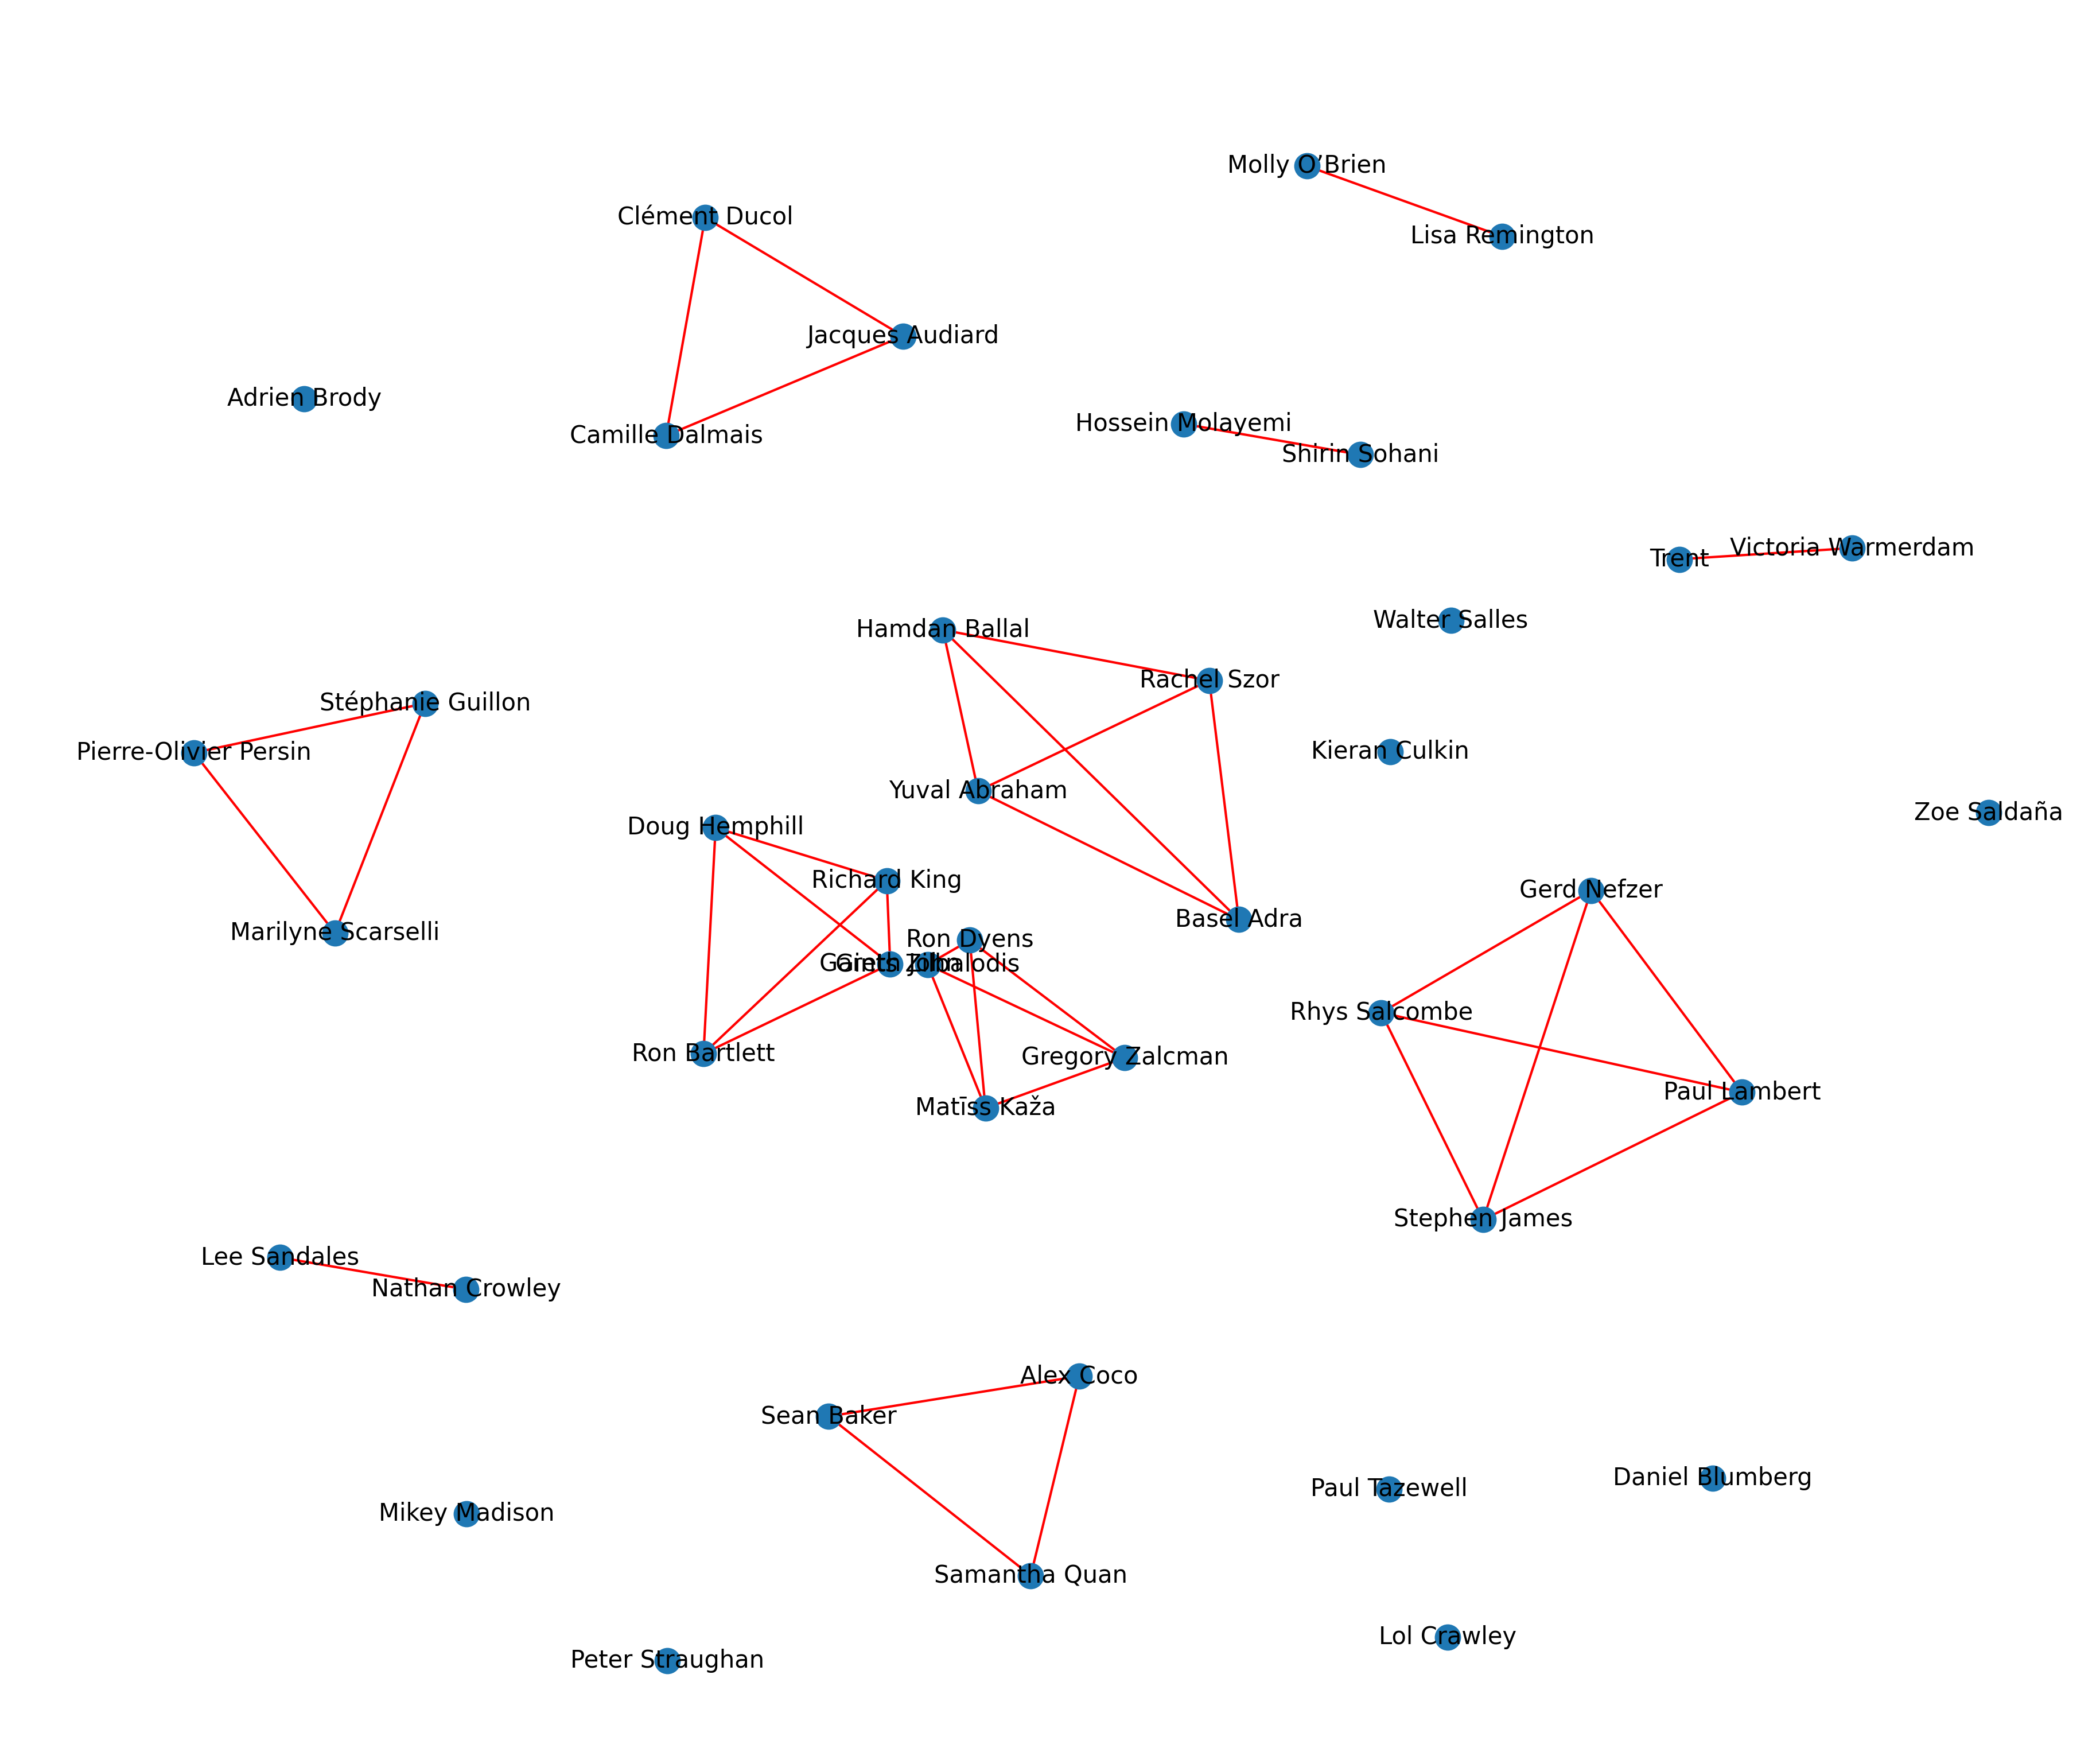

In [ ]:
plt.figure(dpi = 300, figsize = (12, 10))

position = nx.forceatlas2_layout(G, dissuade_hubs = True, gravity = 20, seed = 42)

nx.draw(G, position, with_labels=True, node_size = 100, font_size = 10, font_color = "black", edge_color = "red")


plt.show()

### Modelo 3

#### Geração da lógica da conexão do grafo

In [ ]:
G = nx.Graph()

for actor in data.values():
  G.add_node(actor[0])


for actual_actor in data:
  for comparing_actor in data:
    if (data[actual_actor][3] == data[comparing_actor][3]) and (data[actual_actor][0] != data[comparing_actor][0]):
      G.add_edge(data[actual_actor][0], data[comparing_actor][0])

#### Plotagem do grafo

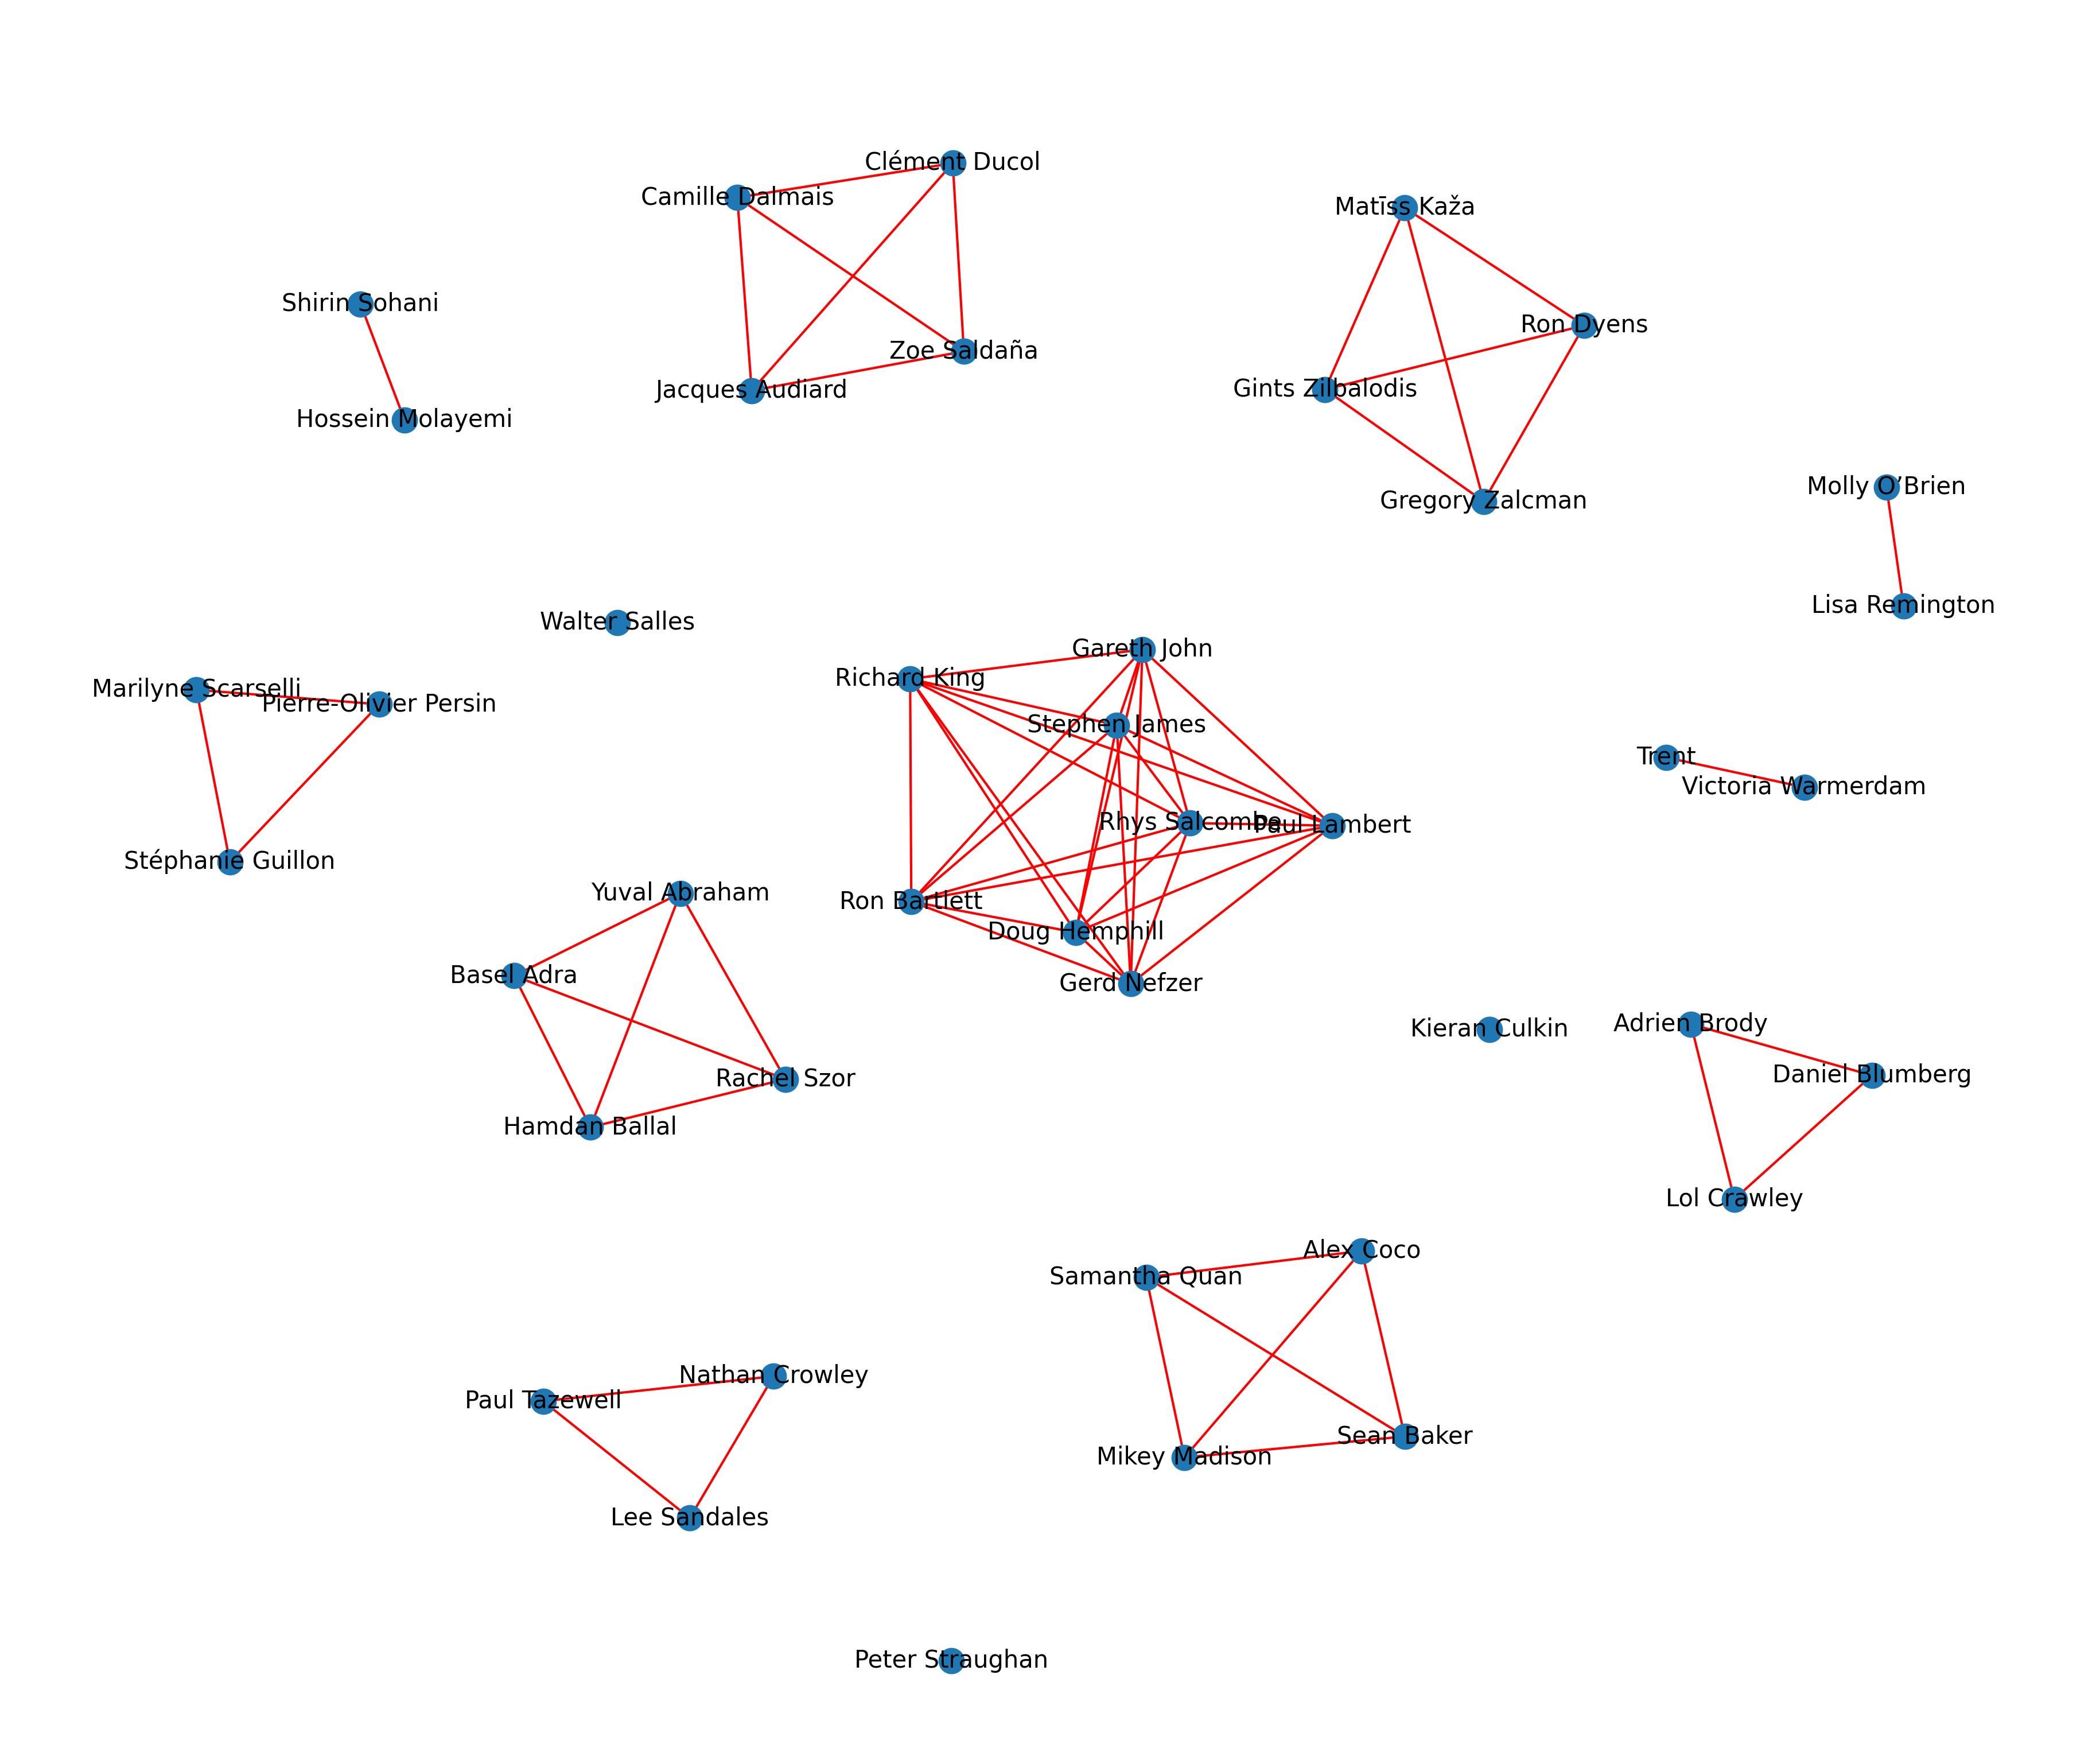

In [ ]:
plt.figure(dpi = 300, figsize = (12, 10))

position = nx.forceatlas2_layout(G, dissuade_hubs = True, gravity = 20, seed = 42)

nx.draw(G, position, with_labels=True, node_size = 100, font_size = 10, font_color = "black", edge_color = "red")


plt.show()

## Exercício 2

### Modelo

#### Geração da lógica da conexão do grafo

In [ ]:
G = nx.Graph()

for airport in data_airports.values():
  G.add_node(airport[0])


for airport in data_airports:
  for edge in data_airports[airport]:
    if (data_airports[airport][0] != edge):
      G.add_edge(data_airports[airport][0], edge[0], weight = edge[1])

#### Plotagem do grafo

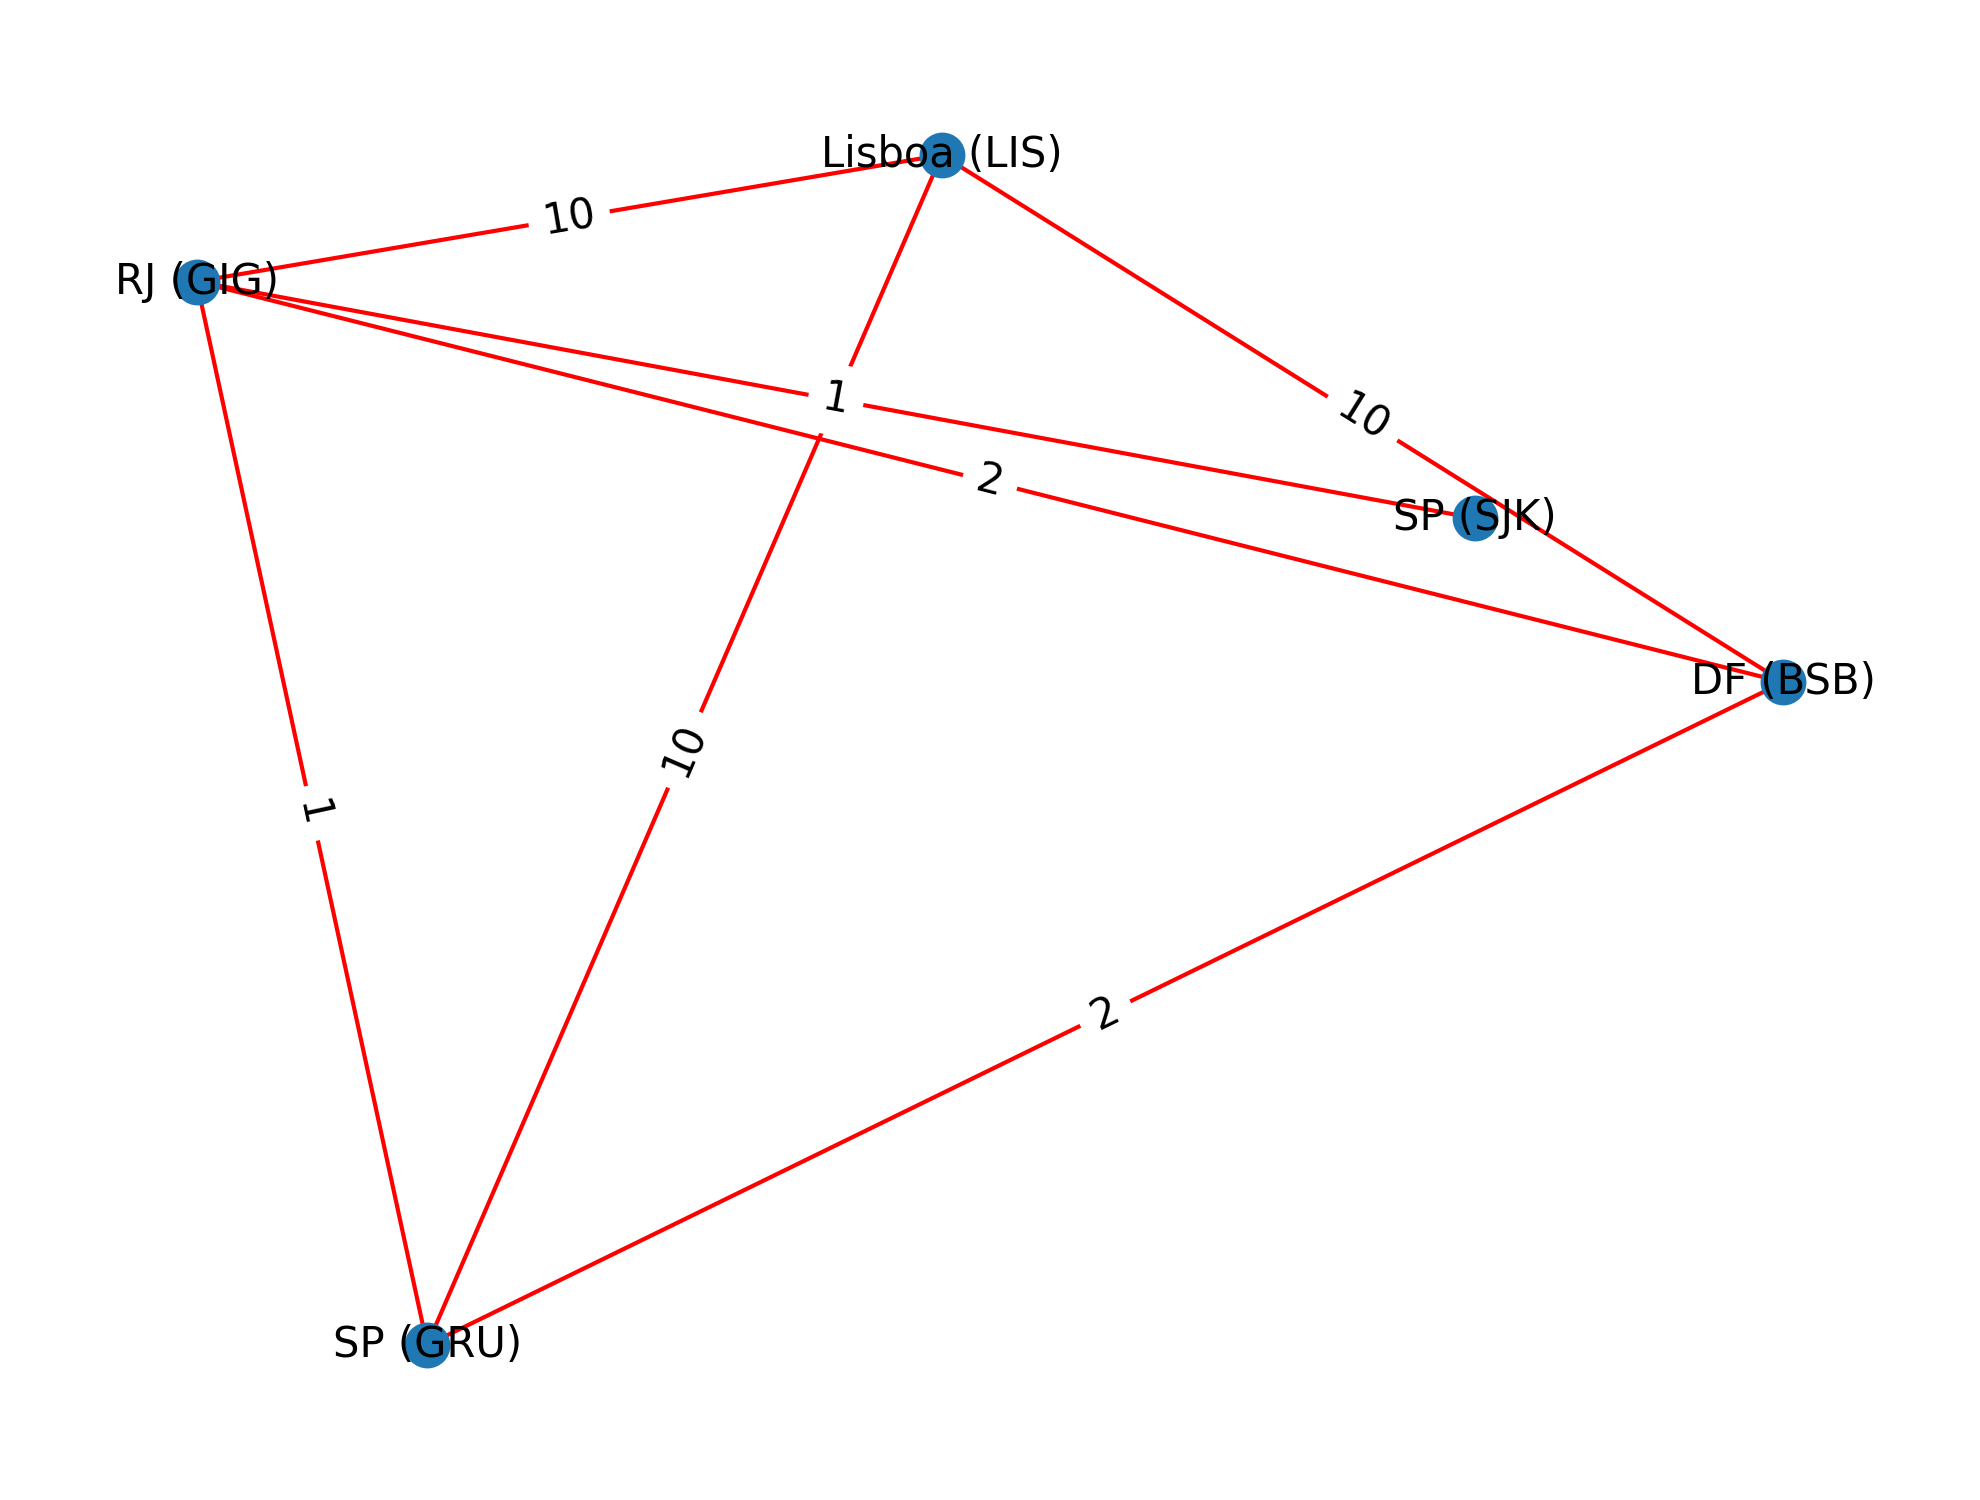

In [ ]:
plt.figure(dpi = 300)

position = nx.random_layout(G, seed = 42)

nx.draw(G, position, with_labels=True, node_size = 100, font_size = 10, font_color = "black", edge_color = "red")

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, position, edge_labels=edge_labels)

plt.show()